In [2]:
import graficas as g
import time
import matplotlib.pyplot as plt
import numpy as np
import importlib

In [3]:
importlib.reload(g)

<module 'graficas' from 'C:\\proyectos\\repositorios\\pt_robustez\\graficas.py'>

In [4]:
num_simulaciones = 50
m = 15
n = 1000

In [5]:
matriz_BA_fallos = []
matriz_WS_fallos = []

inicio = time.time()

for i in range(num_simulaciones):
    #print(f"Vamos a hacer la ",i+1,"-ésima simulación")
    G_BA = g.crear_grafica('barabasi',n,m,0)
    G_WS = g.crear_grafica('watts',n,2*m,0.5)

    N = len(G_BA)

    NCC_BA_fallos = []
    NCC_WS_fallos = []

    for j in range(N):
        NCC_BA_fallos.append(g.componentes_conexas(G_BA))
        NCC_WS_fallos.append(g.componentes_conexas(G_WS))

        G_BA = g.ataques(G_BA,'random')
        G_WS = g.ataques(G_WS,'random')

    matriz_BA_fallos.append(NCC_BA_fallos)
    matriz_WS_fallos.append(NCC_WS_fallos)

final = time.time()

print(f"El tiempo total de ejecución fue: {final-inicio}")


El tiempo total de ejecución fue: 81.05634021759033


In [6]:
matriz_BA_ataques = []
matriz_WS_ataques = []

inicio = time.time()

for i in range(num_simulaciones):
    #print(f"Vamos a hacer la ",i+1,"-ésima simulación")
    G_BA = g.crear_grafica('barabasi',n,m,0)
    G_WS = g.crear_grafica('watts',n,2*m,0.5)

    N = len(G_BA)

    NCC_BA_ataques = []
    NCC_WS_ataques = []

    for j in range(N):
        NCC_BA_ataques.append(g.componentes_conexas(G_BA))
        NCC_WS_ataques.append(g.componentes_conexas(G_WS))

        G_BA = g.ataques(G_BA,'degree')
        G_WS = g.ataques(G_WS,'degree')

    matriz_BA_ataques.append(NCC_BA_ataques)
    matriz_WS_ataques.append(NCC_WS_ataques)

final = time.time()

print(f"El tiempo total de ejecución fue: {final-inicio}")

El tiempo total de ejecución fue: 53.06430196762085


In [7]:
resultados_BA_fallos = [sum(col) / num_simulaciones for col in zip(*matriz_BA_fallos)]
resultados_WS_fallos = [sum(col) / num_simulaciones for col in zip(*matriz_WS_fallos)]

resultados_BA_ataques = [sum(col) / num_simulaciones for col in zip(*matriz_BA_ataques)]
resultados_WS_ataques = [sum(col) / num_simulaciones for col in zip(*matriz_WS_ataques)]

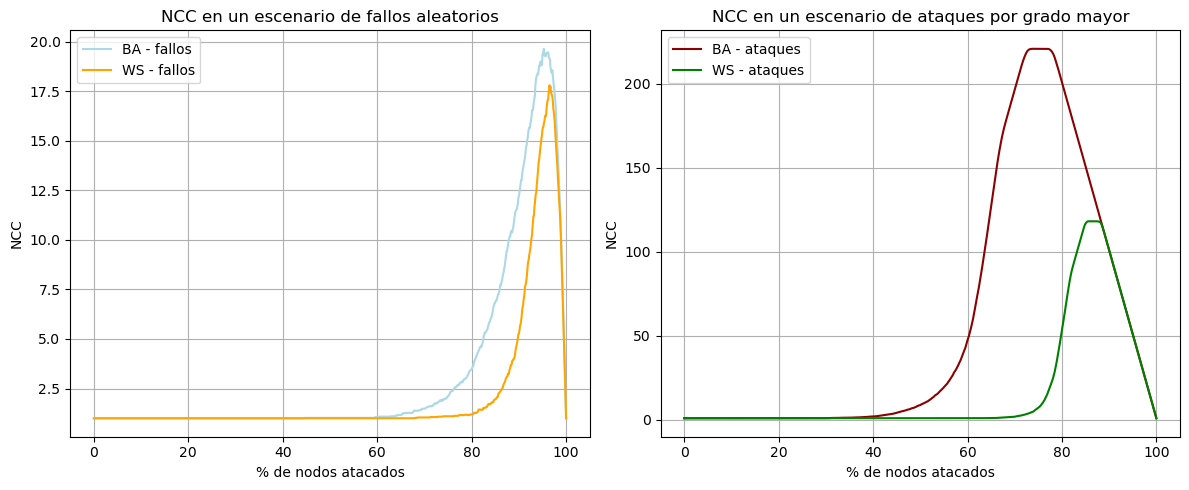

In [8]:
x = np.linspace(0,100,len(resultados_BA_fallos))

fig,axs = plt.subplots(1,2,figsize=(12,5),sharex=True)

#Esté es el plot de fallos aleatorios
axs[0].plot(x,resultados_BA_fallos,label='BA - fallos',color='lightblue')
axs[0].plot(x,resultados_WS_fallos,label='WS - fallos',color='orange')
axs[0].set_title('NCC en un escenario de fallos aleatorios')
axs[0].set_xlabel('% de nodos atacados')
axs[0].set_ylabel('NCC')
axs[0].legend(loc='best')
axs[0].grid(True)
#Esté es el plot de ataques por grado mayor
axs[1].plot(x,resultados_BA_ataques,label='BA - ataques',color='darkred')
axs[1].plot(x,resultados_WS_ataques,label='WS - ataques',color='green')
axs[1].set_title('NCC en un escenario de ataques por grado mayor')
axs[1].set_xlabel('% de nodos atacados')
axs[1].set_ylabel('NCC')
axs[1].legend(loc='best')
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [9]:
#Hay dos formas de medir el LCC, y vamos a usar ambas y a gráficarlas también

matriz_BA_fallos_1 = []
matriz_WS_fallos_1 = []
matriz_BA_fallos_2 = []
matriz_WS_fallos_2 = []

inicio = time.time()

for i in range(num_simulaciones):
    #print(f"Vamos a hacer la ",i+1,"-ésima simulación")
    G_BA = g.crear_grafica('barabasi',n,m,0)
    G_WS = g.crear_grafica('watts',n,2*m,0.5)

    N = len(G_BA)

    NCC_BA_1 = []
    NCC_WS_1 = []
    NCC_BA_2 = []
    NCC_WS_2 = []

    for j in range(N):
        NCC_BA_1.append(g.LCC(G_BA,1,N))
        NCC_WS_1.append(g.LCC(G_WS,1,N))
        NCC_BA_2.append(g.LCC(G_BA,2,N))
        NCC_WS_2.append(g.LCC(G_WS,2,N))

        G_BA = g.ataques(G_BA,'random')
        G_WS = g.ataques(G_WS,'random')

    matriz_BA_fallos_1.append(NCC_BA_1)
    matriz_WS_fallos_1.append(NCC_WS_1)
    matriz_BA_fallos_2.append(NCC_BA_2)
    matriz_WS_fallos_2.append(NCC_WS_2)


final = time.time()

print(f"El tiempo total de ejecución fue: {final-inicio}")

El tiempo total de ejecución fue: 70.3523633480072


In [10]:
matriz_BA_ataques_1 = []
matriz_WS_ataques_1 = []
matriz_BA_ataques_2 = []
matriz_WS_ataques_2 = []

inicio = time.time()

for i in range(num_simulaciones):
    #print(f"Vamos a hacer la ",i+1,"-ésima simulación")
    G_BA = g.crear_grafica('barabasi',n,m,0)
    G_WS = g.crear_grafica('watts',n,2*m,0.5)

    N = len(G_BA)

    LCC_BA_1 = []
    LCC_WS_1 = []
    LCC_BA_2 = []
    LCC_WS_2 = []

    for j in range(N):
        NCC_BA_1.append(g.LCC(G_BA,1,N))
        NCC_WS_1.append(g.LCC(G_WS,1,N))
        NCC_BA_2.append(g.LCC(G_BA,2,N))
        NCC_WS_2.append(g.LCC(G_WS,2,N))

        G_BA = g.ataques(G_BA,'degree')
        G_WS = g.ataques(G_WS,'degree')

    matriz_BA_ataques_1.append(NCC_BA_1)
    matriz_WS_ataques_1.append(NCC_WS_1)
    matriz_BA_ataques_2.append(NCC_BA_2)
    matriz_WS_ataques_2.append(NCC_WS_2)


final = time.time()

print(f"El tiempo total de ejecución fue: {final-inicio}")

El tiempo total de ejecución fue: 83.08576107025146


In [11]:
resultados_BA_fallos_1 = [sum(col) / num_simulaciones for col in zip(*matriz_BA_fallos_1)]
resultados_WS_fallos_1 = [sum(col)/ num_simulaciones for col in zip(*matriz_WS_fallos_1)]
resultados_BA_fallos_2 = [sum(col) / num_simulaciones for col in zip(*matriz_BA_fallos_2)]
resultados_WS_fallos_2 = [sum(col) / num_simulaciones for col in zip(*matriz_BA_fallos_2)]

resultados_BA_ataques_1 = [sum(col) / num_simulaciones for col in zip(*matriz_BA_ataques_1)]
resultados_WS_ataques_1 = [sum(col) / num_simulaciones for col in zip(*matriz_WS_ataques_1)]
resultados_BA_ataques_2 = [sum(col) / num_simulaciones for col in zip(*matriz_BA_ataques_2)]
resultados_WS_ataques_2 = [sum(col) / num_simulaciones for col in zip(*matriz_WS_ataques_2)]

[]

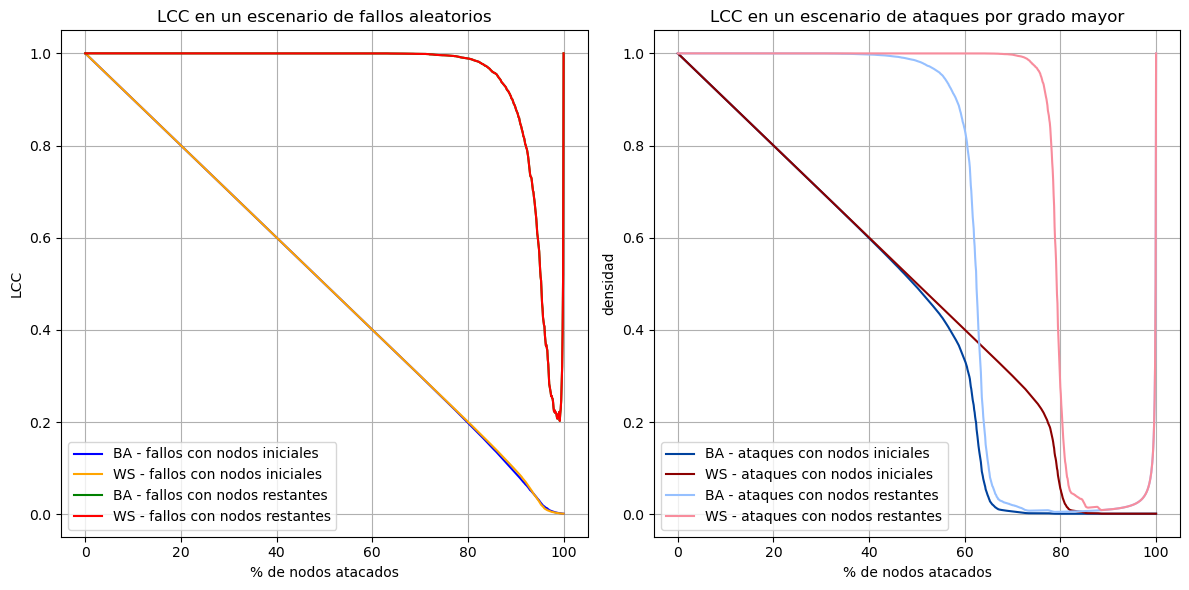

In [13]:
x = np.linspace(0,100,len(resultados_BA_fallos))


fig,axs = plt.subplots(1,2,figsize=(12,6),sharex=True)

#Esté es el plot de fallos aleatorios
axs[0].plot(x,resultados_BA_fallos_1,label='BA - fallos con nodos iniciales',color='blue')
axs[0].plot(x,resultados_WS_fallos_1,label='WS - fallos con nodos iniciales',color='orange')
axs[0].plot(x,resultados_BA_fallos_2,label='BA - fallos con nodos restantes',color='green')
axs[0].plot(x,resultados_WS_fallos_2,label='WS - fallos con nodos restantes',color='red')
axs[0].set_title('LCC en un escenario de fallos aleatorios')
axs[0].set_xlabel('% de nodos atacados')
axs[0].set_ylabel('LCC')
axs[0].legend(loc='best')
axs[0].grid(True)
#Esté es el plot de ataques por grado mayor
axs[1].plot(x,resultados_BA_ataques_1,label='BA - ataques con nodos iniciales',color='#00429d')
axs[1].plot(x,resultados_WS_ataques_1,label='WS - ataques con nodos iniciales',color='darkred')
axs[1].plot(x,resultados_BA_ataques_2,label='BA - ataques con nodos restantes', color='#96c0ff')
axs[1].plot(x,resultados_WS_ataques_2,label='WS - ataques con nodos restantes', color='#f88c9c')
axs[1].set_title('LCC en un escenario de ataques por grado mayor')
axs[1].set_xlabel('% de nodos atacados')
axs[1].set_ylabel('densidad')
axs[1].legend(loc='best')
axs[1].grid(True)

plt.tight_layout()
plt.plot()